## Problem Statement

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the market based on some factors.

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### 1. Importing Libraries

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading Dataset
bike = pd.read_csv('./dataset/day.csv')

### 2. Inspecting Data

In [4]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Artifacting column names
bike = bike.rename(columns = {'yr':'year',
                               'mnth':'month',
                               'weathersit':'weather',
                               'hum':'humid',
                               'cnt':'count'
                               })

### 3.  Data Visualization

Let's now visualise our data using seaborn. We'll first do univariate, divariate and multi-variate analysis of variables and then make a pairplot of all the continous variables present to visualise which variables are most correlated to `count`

#### 3.1 Univariate analysis of variables


In [7]:
print('Dataframe bike has {0} rows & {1} columns'.format(bike.shape[0], bike.shape[1]))

Dataframe bike has 730 rows & 16 columns


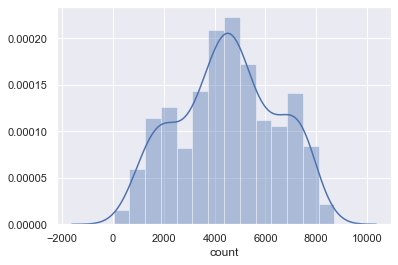

In [8]:
# Histogram of Target variable
sns.set(style="darkgrid")
sns.distplot(bike['count'])
plt.show()

In [9]:
bike.columns

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather', 'temp', 'atemp', 'humid', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [10]:
bike.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humid,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
def univariate_plot(df,col,plottype):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    plottype : plot type       : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if plottype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(12,5))
        ax[0].set_title(col+ " Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title(col +" Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
    
    if plottype == 1:
        plt.subplots(nrows =1,ncols=1,figsize=(6,5))
        plt.title(col + " Bar Plot")
        df[col].value_counts(normalize=True).sort_index().plot.bar()

    plt.show()

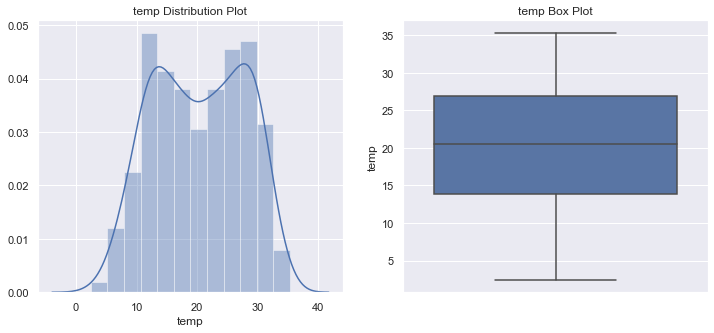

In [12]:
univariate_plot(bike,'temp',0)

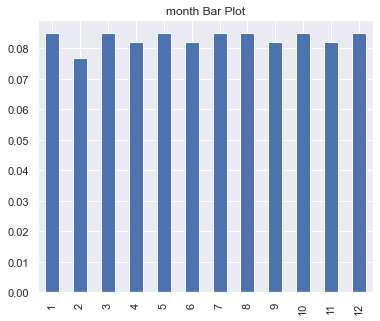

In [13]:
univariate_plot(bike,'month',1)

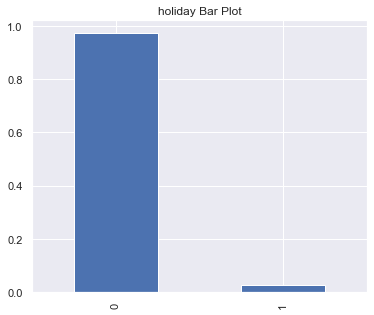

In [14]:
univariate_plot(bike,'holiday',1,)

Uneven data for `holiday` is absolutly justiable as 1 repressents here the holidays. 

#### 3.2 Bivariate Analysis

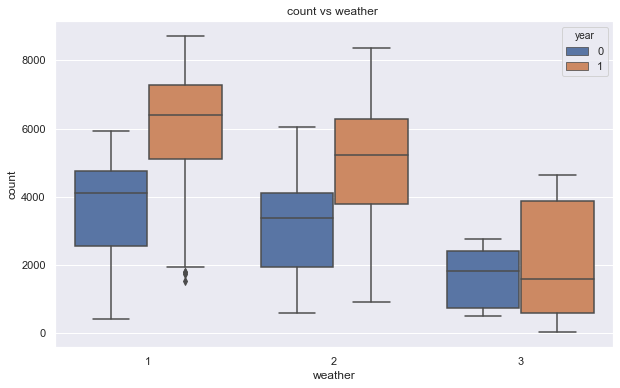

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(data = bike, x='weather', y='count', hue ='year')
plt.title('count vs weather ')
plt.show()

1. Count has increased for all weather types in the year 2019 in comparision to 2018

2. Count is significantly higher for weather 1 and 2 compared to weather 3.

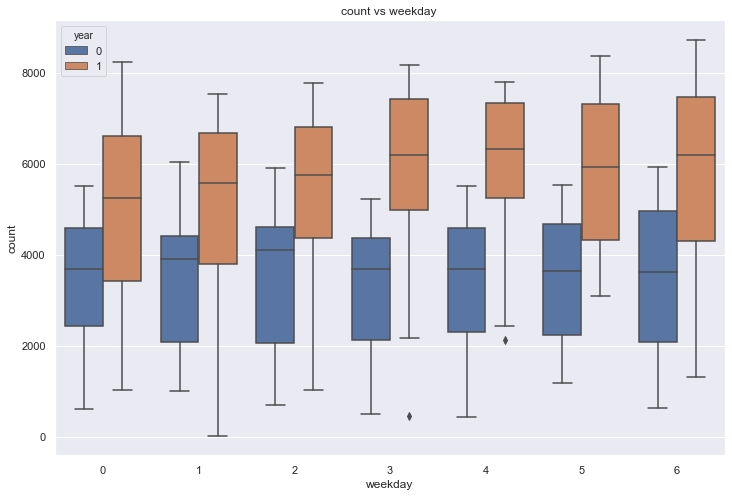

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(data = bike, x='weekday', y='count', hue ='year')
plt.title('count vs weekday ')
plt.show()

In year 2018, count is evenly distributed by its mean for all weekdays.

In year 2019, count is bit lower for weekday 0, 1 and 2 in comparision to other days.

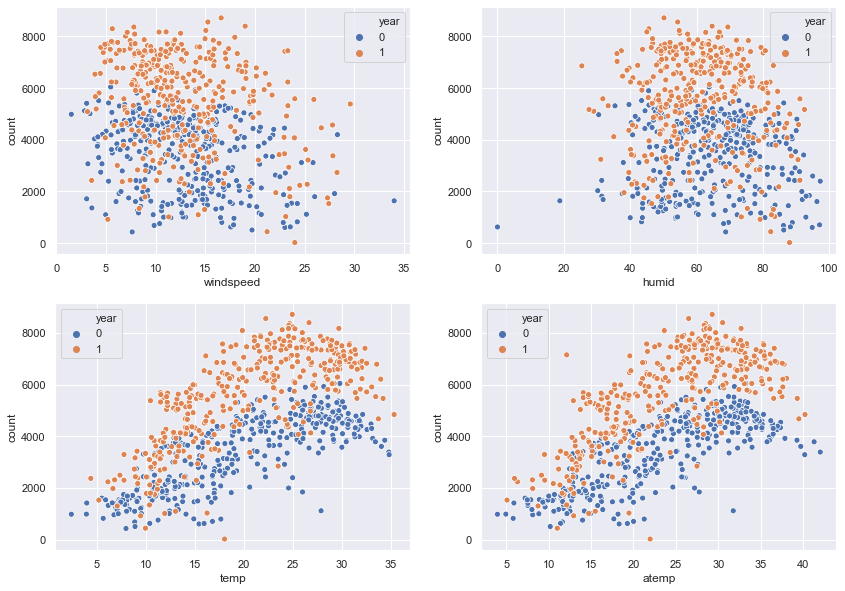

In [17]:
cont_vars = ['windspeed', 'humid', 'temp', 'atemp']

plt.figure(figsize=(14,10))

for i in enumerate(cont_vars):
    plt.subplot(2,2,i[0]+1)
    sns.scatterplot(x=i[1], y='count', data=bike, hue='year')
plt.show()


Clearly we can conclude below points:

`1.` 2019 has more counts than 2018 through the variable distribution

`2.` With increase of temp, we can see that the count has increased

###### Exploring data to check, if the dataset is a timeseries data

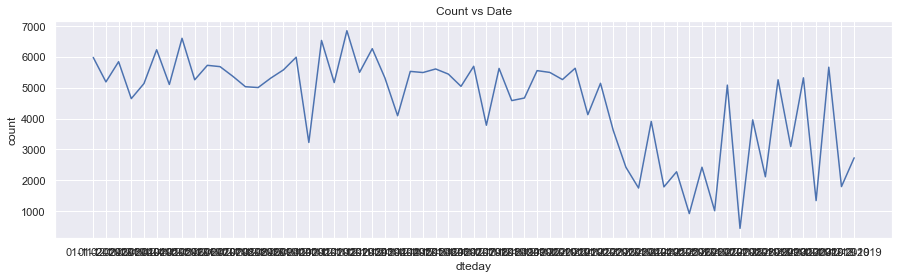

In [18]:
# capturing Nov & Dec,19 data to draw line plot agsainst time
month_list = [11,12]
bike_nov_dec_19 = bike[( bike['month'].isin(month_list) )  & (bike['year']==1)]

plt.figure(figsize=(15,4))
sns.lineplot(x='dteday' ,y='count' , data= bike_nov_dec_19)
plt.title('Count vs Date')
plt.show()

Line plot doesn't have any clear pattern. Showing that data is not a timeseries data.

Thus, We need to divide data randomly into train test data sets.

#### 3.3  Multivariate Analysis

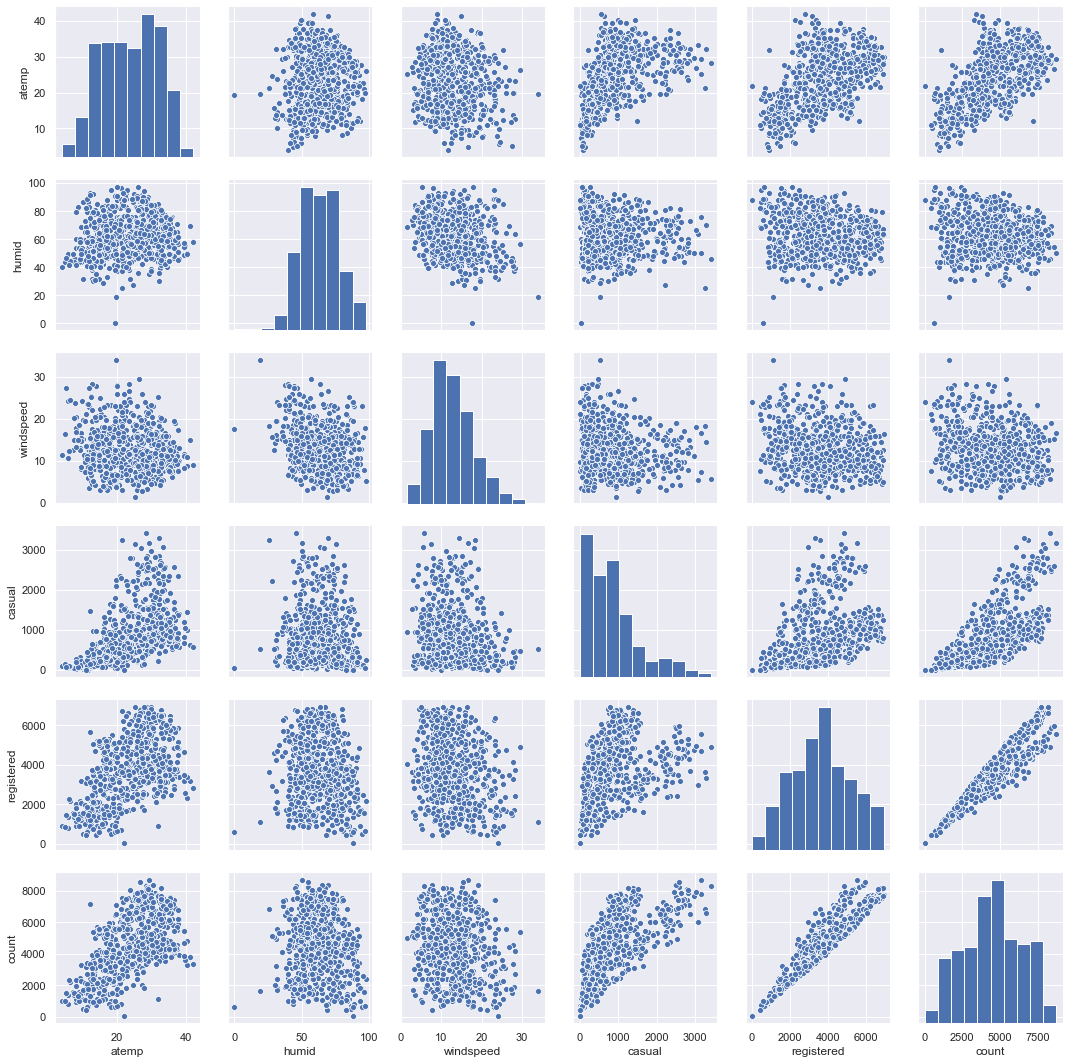

In [19]:
# Drawing pairplot of all numerical variables
sns.pairplot( bike[['atemp', 'humid', 'windspeed','casual','registered', 'count']])
plt.show()

Clearly, `registered` is highly coorelated to count
count is also bit coorelated to `atemp`

##### Calculating coorelation amongst all variables

In [20]:
def calc_corr(df):
    corr = df.corr()
    corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    corrdf = corr.unstack().reset_index()
    corrdf.columns = ['VAR1', 'VAR2', 'Correlation']
    corrdf.dropna(subset = ['Correlation'], inplace = True)
    corrdf['Correlation'] = round(corrdf['Correlation'], 2)
    # Since we see correlation as an absolute value, we are converting it into absolute value
    corrdf['Correlation_abs'] = corrdf['Correlation'].abs()
    result = corrdf.sort_values(by = 'Correlation_abs', ascending = False).reset_index().drop(columns='index')
    return result

In [21]:
# Correlation for bike
calc_corr(bike).head(10)

,VAR1,VAR2,Correlation,Correlation_abs
0,atemp,temp,0.99,0.99
1,count,registered,0.95,0.95
2,year,instant,0.87,0.87
3,month,season,0.83,0.83
4,count,casual,0.67,0.67
5,registered,instant,0.66,0.66
6,count,atemp,0.63,0.63
7,count,temp,0.63,0.63
8,count,instant,0.63,0.63
9,registered,year,0.60,0.60


temp and atemp are giving almost the same data and are almost 100% corrleted. Similarly, Count and registered are.


Dropping `temp`,`instant`,`dteday`, `casual` and `registered`

In [22]:
bike.drop(columns = ['instant', 'dteday','temp','casual','registered'], inplace=True)

In [23]:
bike.head(2)

,season,year,month,holiday,weekday,workingday,weather,atemp,humid,windspeed,count
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801


### 4. Data Preparation 

In [24]:
# Mapping values to categorical columns

season_map = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
month_map = {1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov' ,12:'dec'}
weather_map = {1:'clear_weather', 2:'misty_weather', 3:'light_snow', 4:'heavy_rain'}
weekday_map = {1:'mon', 2:'tue', 3:'wed', 4:'thr', 5:'fri', 6:'sat', 0:'sun'}

bike['season'].replace(season_map, inplace= True)
bike['month'].replace(month_map, inplace= True)
bike['weather'].replace(weather_map, inplace=True)
bike['weekday'].replace(weekday_map, inplace=True)


######  Identifying categorical columns having nominal values

In [25]:
categorical_vars = ['season', 'month', 'holiday', 'weekday', 'workingday', 'weather']

In [26]:
for feature in categorical_vars:
    print(bike[feature].value_counts(),'')
    print()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64 

dec    62
oct    62
jul    62
mar    62
aug    62
may    62
jan    62
apr    60
nov    60
jun    60
sep    60
feb    56
Name: month, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

sat    105
sun    105
mon    105
thr    104
fri    104
tue    104
wed    103
Name: weekday, dtype: int64 

1    499
0    231
Name: workingday, dtype: int64 

clear_weather    463
misty_weather    246
light_snow        21
Name: weather, dtype: int64 



#####  Out of the above variables, we can convert categorical columns as dummy variables for our data exploration

In [27]:
# Get the dummy variables for the features in status df after removing the 1st dummy having '00' value
features = ['season', 'month', 'weekday', 'weather']  

for i in features:
    status = pd.get_dummies(bike[i],drop_first=True)
# Concatenating status df to bike df
    bike = pd.concat([bike, status], axis=1) 

bike.head()

,season,year,month,holiday,weekday,workingday,weather,atemp,humid,windspeed,...,oct,sep,mon,sat,sun,thr,tue,wed,light_snow,misty_weather
0,spring,0,jan,0,sat,0,misty_weather,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sun,0,misty_weather,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,mon,1,clear_weather,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tue,1,clear_weather,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wed,1,clear_weather,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [28]:
# droping category columns with dummmy varibales created
bike.drop(columns= features, inplace =True)

In [29]:
bike.shape

(730, 29)

In [30]:
bike.columns

Index(['year', 'holiday', 'workingday', 'atemp', 'humid', 'windspeed', 'count',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thr', 'tue',
       'wed', 'light_snow', 'misty_weather'],
      dtype='object')

###### Train Test Spliting

In [31]:
df_train, df_test = train_test_split(bike, test_size = 0.3, random_state = 100)

###### Scaling columns atemp, humid and windspeed to bring them under the same range

In [32]:
# Instantiating Min-Max Scalar
scalar = MinMaxScaler()

In [33]:
# Scaling numerical columns except dummy variables or variables with 0-1 values
num_vars = ['atemp','humid','windspeed']

df_train[num_vars] = scalar.fit_transform(df_train[num_vars])
df_train.head()

,year,holiday,workingday,atemp,humid,windspeed,count,spring,summer,winter,...,oct,sep,mon,sat,sun,thr,tue,wed,light_snow,misty_weather
653,1,0,1,0.501133,0.575354,0.300794,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


##### Dividing into X and Y sets for the model building

In [34]:
#y_bike = y_bike.values.reshape(-1,1)
y_train = df_train.pop('count')
X_train = df_train

In [35]:
print(y_train.shape)
print(X_train.shape)

(511,)
(511, 28)


### 5. Data Modelling and Evaluation

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

#### RFE
Recursive feature elimination

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 12
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('humid', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 7),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', True, 1),
 ('dec', False, 5),
 ('feb', False, 4),
 ('jan', False, 3),
 ('jul', False, 10),
 ('jun', False, 9),
 ('mar', False, 17),
 ('may', False, 8),
 ('nov', False, 6),
 ('oct', False, 14),
 ('sep', True, 1),
 ('mon', False, 12),
 ('sat', True, 1),
 ('sun', False, 11),
 ('thr', False, 15),
 ('tue', False, 13),
 ('wed', False, 16),
 ('light_snow', True, 1),
 ('misty_weather', True, 1)]

In [39]:
# Storing 12 varaibles come out of RFEs
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'atemp', 'humid', 'windspeed', 'summer', 'winter',
       'aug', 'sep', 'sat', 'light_snow', 'misty_weather'],
      dtype='object')

Eventually, Taken 12 variables using RFE and eventually remove 2 variables to create model on 10 variables

In [40]:
X_train.columns[~rfe.support_]

Index(['workingday', 'spring', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
       'nov', 'oct', 'mon', 'sun', 'thr', 'tue', 'wed'],
      dtype='object')

#### 5.2 Building model using statsmodel (detailed statistics)

In [41]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [42]:
import statsmodels.api as sm  

By default, the `statsmodels` library fits a line on the dataset which passes through the origin. But in order to have an intercept, we need to manually use the `add_constant` attribute of `statsmodels`. And once we've added the constant to our `X_train` dataset, we can go ahead and fit a regression line using the `OLS` (Ordinary Least Squares) attribute of `statsmodels` as shown below


In [43]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [44]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [45]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.8
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          3.35e-187
Time:                        22:35:39   Log-Likelihood:                -4133.5
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     498   BIC:                             8348.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1992.7339    239.410      8.324

`sat` is insignificant in presence of other variables; can be dropped. but before dropping we can check the overall model for multicollinearity

In [46]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [47]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humid,14.75
2,atemp,9.74
4,windspeed,3.63
11,misty_weather,2.13
0,year,2.02
5,summer,1.84
6,winter,1.75
7,aug,1.55
8,sep,1.30
9,sat,1.19


In [48]:
# Droping dummy variable 'sat' from the training dataset
X_train_lm2 = X_train_new.drop(['sat'], axis=1)

In [49]:
# Running the linear model again lm2
X_train_lm2 = sm.add_constant(X_train_lm2)

lm2 = sm.OLS(y_train,X_train_lm2).fit()   

In [50]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.5
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          5.45e-188
Time:                        22:35:39   Log-Likelihood:                -4134.4
No. Observations:                 511   AIC:                             8293.
Df Residuals:                     499   BIC:                             8344.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2028.0613    238.217      8.514

Adjusted R2 is `83.3`, same as earlier model and all variables seems significant

In [51]:
X_train_lm2 = X_train_lm2.drop(['const'], axis=1)

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humid,14.70
2,atemp,9.74
4,windspeed,3.58
10,misty_weather,2.13
0,year,2.02
5,summer,1.84
6,winter,1.74
7,aug,1.55
8,sep,1.30
9,light_snow,1.16


In [53]:
# droping variable humid as the multicollinearity is high with other variables for this variable
X_train_lm3 = X_train_lm2.drop(['humid'], axis=1)

In [54]:
X_train_lm3 = sm.add_constant(X_train_lm3)

lm3 = sm.OLS(y_train,X_train_lm3).fit()   # Running the linear model

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     241.8
Date:                Fri, 14 Aug 2020   Prob (F-statistic):          2.40e-184
Time:                        22:35:40   Log-Likelihood:                -4145.9
No. Observations:                 511   AIC:                             8314.
Df Residuals:                     500   BIC:                             8360.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1127.7660    149.358      7.551

In [55]:
X_train_vif = X_train_lm3.drop(['const'], axis=1)


In [56]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_vif
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.92
3,windspeed,3.05
0,year,2.00
4,summer,1.83
6,aug,1.55
5,winter,1.50
9,misty_weather,1.49
7,sep,1.30
8,light_snow,1.08
1,holiday,1.04


Above `10` variables we can continue with model validation

In [57]:
# Storing variables used for train model
col2 = X_train_vif.columns

### 6. Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [58]:
y_train_count = lm3.predict(X_train_lm3)

In [59]:
X_train_lm3.columns

Index(['const', 'year', 'holiday', 'atemp', 'windspeed', 'summer', 'winter',
       'aug', 'sep', 'light_snow', 'misty_weather'],
      dtype='object')

In [60]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 0, 'Errors')

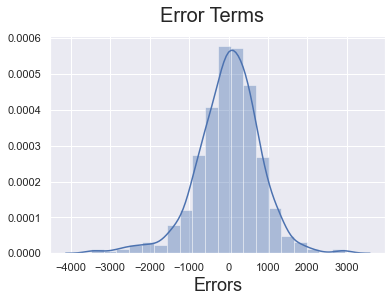

In [61]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)    

### 7. Making Predictions

##### Applying the scaling on the test sets

In [62]:
# Scaling numerical columns except dummy variables or variables with 0-1 values on test data
num_vars = ['atemp','humid','windspeed']

df_test[num_vars] = scalar.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,atemp,humid,windspeed,count,spring,summer,winter,...,oct,sep,mon,sat,sun,thr,tue,wed,light_snow,misty_weather
184,0,1,0,0.769660,0.657364,0.084219,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


##### Dividing into X_test and y_test

In [63]:
y_test = df_test.pop('count')
X_test = df_test

In [64]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col2]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [65]:
# Making predictions
y_pred = lm3.predict(X_test_new)

Text(0, 0.5, 'y_pred')

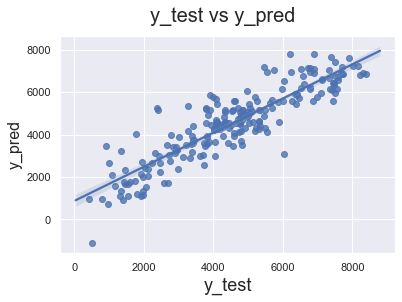

In [66]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
sns.set(color_codes=True)
sns.regplot(y_test,y_pred,color="B")
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

In [67]:
# Creating X_test dataframe with RFE selected variables
X_test_rfe = X_test[col2]

# Adding a constant variable 
import statsmodels.api as sm  
X_test_rfe = sm.add_constant(X_test_rfe)

lm = sm.OLS(y_test,X_test_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     86.44
Date:                Fri, 14 Aug 2020   Prob (F-statistic):           1.90e-68
Time:                        22:35:40   Log-Likelihood:                -1783.9
No. Observations:                 219   AIC:                             3590.
Df Residuals:                     208   BIC:                             3627.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           544.5199    244.907      2.223

In [68]:
X_test_rfe.drop(['const'], axis=1, inplace = True)

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_test_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,4.73
3,windspeed,3.37
0,year,1.86
4,summer,1.81
9,misty_weather,1.45
5,winter,1.40
6,aug,1.34
7,sep,1.24
8,light_snow,1.12
1,holiday,1.05


In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7939825094150781

### Conclusion:

Final Model lm3 has adjusted-R2 for training data as `82.5` whereas for test data, it is `79.7` which is not that bad.


Some, of variables as in windspeed and aug has come insignificant. This variation in training result and test result can be because of their limited data in either of the dataset .

`Durbin-Watson` is also close to 2, significes that overall model is not that bad and can be tried for tuning it further by reducing the variables

We can see that the equation of our best fitted line is:

$ count = 544.52 + 5187.4855  \times  atemp - 192.3214  \times  windspeed + 2071.1417 \times year + 745.452 \times summer - 613.1567 \times misty_weather + 1310.8395 \times winter + 255.1722 \times aug + 687.1063 \times sep - 2034.0912 \times light_snow - 572.3267 \times holiday $


#### 1. Which variables are significant in predicting the demand for shared bikes.

`atemp`, `year`, `winter` and `light_snow` are some other significant variables

#### 2. How well those variables describe the bike demands

variables like `atemp`, `year`, `winter` are positively impacting the demand whereas the weather with light_show negatively impacts the demand